In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Propagator import Propagator
from files.Observer import TimeEvolutionObserverLog
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Simulation setup

In [2]:
nr_particles = 10**1
nr_steps = 10**6

#### Source parameters

In [3]:
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
mfp = np.array([3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13])  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc

#### Observer

In [4]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 100

#### Propagator

In [5]:
sim = Simulation()

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

propagator = Propagator()
sim.add_propagator(propagator)

observer = TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source
Propagator initialized
number steps:  92
observer
CPU times: user 10.3 s, sys: 12.3 ms, total: 10.3 s
Wall time: 10.3 s


In [9]:
%time sim.run_simulation(nr_steps)
sim.save_data('data')

error: please reinitialize the simulation
CPU times: user 7.38 s, sys: 31.4 ms, total: 7.42 s
Wall time: 7.39 s


## Analyze statistics


init statistics plotting class


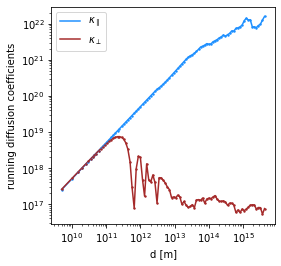

In [10]:
df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)